<a href="https://colab.research.google.com/github/NovrianPratama/MachineLearning/blob/main/Overfitting_Underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Latihan Studi Kasus: Overfitting & Underfitting**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Import Data California
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# normalisasi data
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

# Membagi data train and validation
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.3, random_state=42)


In [8]:
# inisialisasi model DecisionTree
model = DecisionTreeRegressor(max_depth=50, random_state=42)

# melatih model
model.fit(X_train, y_train)

# Melatih data testing
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Medeteksi Overfitting

Untuk mendeteksi overfitting, kita perlu membandingkan performa model pada data latih dan data uji.

In [4]:
# Evaluasi performa data train dan testing
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# melihat hasil evaluasi
print(f"MSE pada data Train: {train_mse}")
print(f"MSE pada data Test: {test_mse}")

MSE pada data Train: 9.904697258622977e-32
MSE pada data Test: 0.5265727720164728


## Learning Curve

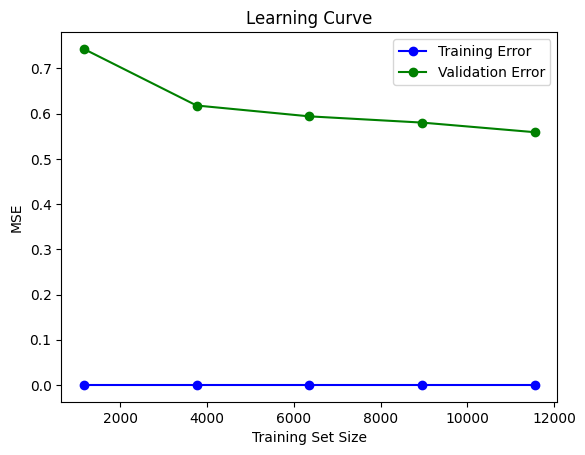

In [5]:
# Menghitung Learning Curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Menghitung Rata-rata dan Standar Deviasi
train_mean = -np.mean(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)

# Plot Learning Curve
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Error')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation Error')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('MSE')
plt.legend()
plt.show()

Pada gambar di atas, dapat kita lihat bahwa learning curve menunjukkan jarak yang sangat jauh antara training error dan cross-validation error, hal ini memberikan indikasi jelas bahwa terjadi overfitting

## **1. Mengatasi Overfitting dengan Cross Validation**

Mengukur seberapa baik model dapat menggeneralisasi ke data baru dengan membagi data menjadi beberapa subset untuk pelatihan dan pengujian bergantian.





In [6]:
# inisialisasi cross validation
cross_val = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Menapilkan hasil cross validation
print(f'Nilai Cross Validaiton MSE: {-cross_val.mean()}')

Nilai Cross Validaiton MSE: 0.5563505679371618


 hasil Cross-Validation MSE sebesar 0.556 didapatkan. Sebelumnya, model menunjukkan hasil Training MSE yang sangat kecil, yaitu 9.90 × 10⁻³² dan Test MSE sebesar 0.526. Hasil ini menunjukkan bahwa sebelum cross-validation, model mengalami overfitting

## 2. Regularization (Max Depth, Min Samples Split, Min Samples Leaf)

In [7]:
# membuat model dengan max_depth yang lebih rendah
model_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
model_reg.fit(X_train, y_train)

# Evaluasi pada data latih
y_train_pred_reg = model_reg.predict(X_train)
y_test_pred_reg = model_reg.predict(X_test)

# hitung mse
train_mse_reg = mean_squared_error(y_train, y_train_pred_reg)
test_mse_reg = mean_squared_error(y_test, y_test_pred_reg)

# Menampilkan hasilnya
print(f'Training MSE (After Regularization): {train_mse_reg}')
print(f'Testing MSE (After Regularization): {test_mse_reg}')

Training MSE (After Regularization): 0.4928096322147045
Testing MSE (After Regularization): 0.5210801561811792


Setelah menerapkan regularisasi pada model Decision Tree, hasil sebagai berikut didapatkan.

- Training MSE (Setelah Regularisasi): 0.4928
- Test MSE (Setelah Regularisasi): 0.5211

Hasil ini menunjukkan peningkatan dibandingkan sebelumnya, yaitu perbedaan antara Training MSE dan Test MSE menjadi lebih kecil. Ini berarti model telah menjadi lebih seimbang dan tidak lagi terlalu fokus pada data latih (overfitting) karena performa dalam data uji sekarang lebih mendekati performa pada data latih.

## **3. Pruning (Pruning Manual pada Kedalaman Pohon)**

Teknik yang digunakan adalah Cost Complexity Pruning dengan parameter ccp_alpha. Ini memungkinkan kita memangkas cabang-cabang pohon yang kurang penting. Semakin besar nilai ccp_alpha, semakin banyak pemangkasan dilakukan.

In [10]:
# Menggunakan cc_alpha untuk pruning (Cost Complexity Pruning)
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Melatih model pruning
model_prun = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alphas[-2])
model_prun.fit(X_train, y_train)

# Membuat prediksi model
prun_train_pred = model_prun.predict(X_train)
prun_test_pred = model_prun.predict(X_test)

# Membuat evaluasi model
prun_train_pred_mse = mean_squared_error(y_train, prun_train_pred)
prun_test_pred_mse = mean_squared_error(y_test, prun_test_pred)

# Menampilkan hasil evaluasi
print(f'Training MSE (After Pruning): {prun_train_pred_mse}')
print(f'Testing MSE (After Pruning): {prun_test_pred_mse}')

Training MSE (After Pruning): 0.9189620181001872
Testing MSE (After Pruning): 0.9194598144703808


Sebelum melakukan pruning hasil model yaitu:

- MSE pada data Train: 9.904697258622977e-32

- MSE pada data Test: 0.5265727720164728

Setelah melakukan pruning pada model Decision Tree, hasil yang diperoleh sebagai berikut.

- Pruned Model Training MSE: 0.9189
- Pruned Model Test MSE: 0.9194

Hasil ini menunjukkan bahwa setelah diterapkan pruning, kesalahan pada data latih dan data uji menjadi hampir sama. Ini adalah tanda bahwa model telah berhasil mengurangi overfitting karena perbedaan antara MSE pada data latih dan data uji sudah sangat kecil.

## 4. Data Augmentation

Data augmentation adalah penggunaan teknik untuk meningkatkan kualitas dan kemampuan model dengan membuat variasi tambahan dari data yang sudah ada.
Melakukan augmentasi dengan menambahkan sedikit noise atau gangguan pada data latih. Noise ini adalah gangguan acak yang tidak signifikan, tetapi cukup untuk memberikan variasi pada data latih.

In [11]:
# Menambah sedikit noise ke data sebagai augmentasi
X_train_aug = X_train + np.random.normal(0, 0.1, X_train.shape)

# Melatih model DT utk Augmentasi
model_aug = DecisionTreeRegressor(max_depth=10, random_state=42)
model_aug.fit(X_train_aug, y_train)

# Memprediksi data latih
y_train_aug = model_aug.predict(X_train_aug)
y_test_aug = model_aug.predict(X_test)

# Evaluasi MSE
y_train_aug_mse = mean_squared_error(y_train, y_train_aug)
y_test_aug_mse = mean_squared_error(y_test, y_test_aug)

# Menampilkan hasil evaluasi
print(f'Training MSE (After Data Augmentation): {y_train_aug_mse}')
print(f'Testing MSE (After Data Augmentation): {y_test_aug_mse}')

Training MSE (After Data Augmentation): 0.31504062709408553
Testing MSE (After Data Augmentation): 0.5409110025141391


Setelah menerapkan data augmentation dengan menambahkan noise pada data latih, hasil yang diperoleh sebagai berikut.

- Augmented Data Training MSE: 0.3193
- Augmented Data Test MSE: 0.5219

Ini menunjukkan bahwa model sekarang lebih general dan tidak terlalu pas dengan data latih. Test MSE tetap hampir sama pada 0.5219, yang menunjukkan performa model dalam data uji tidak banyak berubah.

Secara keseluruhan, data augmentation membantu mengurangi overfitting dengan membuat model lebih adaptif terhadap variasi dalam data latih meskipun hasil pada data uji tetap stabil.

## **5. Dropout**

Dropout adalah teknik regulasi yang digunakan untuk mencegah overfitting dalam model machine learning, khususnya neural networks. Teknik ini bekerja dengan "menghilangkan" beberapa neuron secara acak selama pelatihan sehingga model tidak terlalu bergantung pada neuron tertentu dan belajar untuk membuat keputusan berdasarkan fitur yang lebih robust.

In [12]:
# Menggunakan algoritam Random forest untuk teknik Dropout
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model_rf.fit(X_train, y_train)

# menguji data latih dan testing
train_pred_rf = model_rf.predict(X_train)
test_pred_rf = model_rf.predict(X_test)

# Melakukan evaluasi pada data
rf_train_mse = mean_squared_error(y_train, train_pred_rf)
rf_test_mse = mean_squared_error(y_test, test_pred_rf)

# Menampilkan hasil evaluasi
print(f'Training MSE (After Dropout): {rf_train_mse}')
print(f'Testing MSE (After Dropout): {rf_test_mse}')

Training MSE (After Dropout): 0.1694509694100654
Testing MSE (After Dropout): 0.2944646271173382


Hasil dari penerapan Random Forest sebagai berikut.

- Training MSE: 0.1694
- Test MSE: 0.2945

Meskipun MSE dalam data latih sedikit meningkat dibandingkan dengan model awal, MSE pada data uji menunjukkan penurunan yang signifikan. Ini menandakan bahwa model Random Forest lebih baik dalam mengatasi overfitting dan memberikan hasil yang lebih stabil saat diterapkan pada data baru.

# **Study Case: Underfitting**

In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


In [19]:
# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Membagi Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)

(398, 30)
(171, 30)


# **Mendeteksi Underfitting**
## 1. Mengevaluasi performa pada data latih dan data uji

In [22]:
# Membuat data underfit menggunakan model Decision Tree
model_underfit = DecisionTreeClassifier(max_depth=1, random_state=42)
model_underfit.fit(X_train, y_train)

# membuat prediksi model
y_train_pred_underfit = model_underfit.predict(X_train)
y_test_pred_underfit = model_underfit.predict(X_test)

# Membuat evaluasi acuracy
underfit_train_acc = accuracy_score(y_train, y_train_pred_underfit)
underfit_test_acc = accuracy_score(y_test, y_test_pred_underfit)

# Menampikan hasil accuracy
print(f'Training Accuracy (Underfit): {underfit_train_acc}')
print(f'Testing Accuracy (Underfit): {underfit_test_acc}')

Training Accuracy (Underfit): 0.9246231155778895
Testing Accuracy (Underfit): 0.8947368421052632


Hasil yang diperoleh adalah berikut.

- Underfit Model Training Accuracy: 0.9246

- Underfit Model Test Accuracy: 0.8947

Dari hasil ini, kita dapat melihat bahwa meskipun model memiliki akurasi yang cukup baik pada data latih (92.46%), akurasinya sedikit menurun dalam data uji (89.47%). Perbedaan ini menunjukkan bahwa model tidak terlalu menyesuaikan diri dengan data latih, tetapi juga tidak menangkap pola yang cukup baik untuk memprediksi data uji dengan akurasi lebih tinggi. Ini adalah indikasi bahwa model mengalami underfitting.


## **2. Learning Curve**

Membuat Visualiassi Learning Curve untuk melihat data underfitting atau tidak

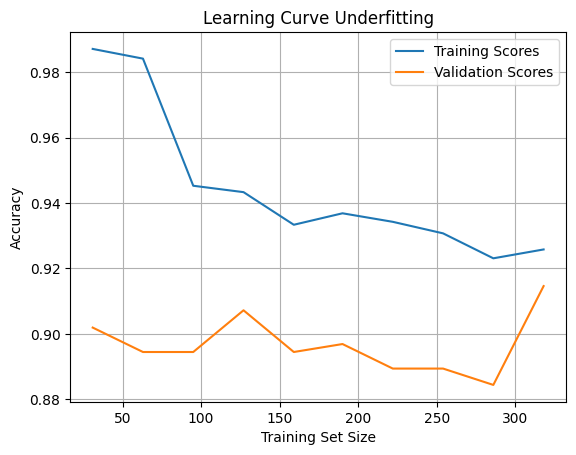

In [23]:
# Learning Curve memeriksa data latih
train_sizes, train_scores, test_scores = learning_curve(model_underfit, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# plot learning curve
plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training Scores')
plt.plot(train_sizes, test_scores_mean, label='Validation Scores')
plt.title('Learning Curve Underfitting')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Jika learning curve menunjukkan bahwa baik skor pelatihan maupun skor validasi tidak meningkat secara signifikan dengan bertambahnya ukuran data, ini mengindikasikan bahwa model mungkin tidak cukup kompleks untuk menangkap pola dalam data. Ini merupakan tanda underfitting.

## 2. Pemeriksaan Kompleksitas Model

In [25]:
# Menambah parameter untuk meningkatkan kompleksitas model

# Membuat data Complex menggunakan model Decision Tree
model_complex = DecisionTreeClassifier(max_depth=5, random_state=42)
model_complex.fit(X_train, y_train)

# membuat prediksi model
y_train_pred_complex = model_complex.predict(X_train)
y_test_pred_complex = model_complex.predict(X_test)

# Membuat evaluasi acuracy
complex_train_acc = accuracy_score(y_train, y_train_pred_complex)
complex_test_acc = accuracy_score(y_test, y_test_pred_complex)

# Menampikan hasil accuracy
print(f'Training Accuracy (complex): {complex_train_acc}')
print(f'Testing Accuracy (complex): {complex_test_acc}')

Training Accuracy (complex): 0.9949748743718593
Testing Accuracy (complex): 0.9532163742690059


Dengan menggunakan model yang lebih kompleks, yakni dengan max_depth=5, perubahan signifikan dalam hasil terlihat sebagai berikut.

- Akurasi Model Kompleks pada Data Latih: 0.995
Akurasi Model Kompleks pada Data Uji: 0.953
Model sederhana yang mengalami underfitting sebelumnya hanya mencapai akurasi pelatihan sekitar 0.925 dan akurasi uji sekitar 0.895. Model yang lebih kompleks ini hampir mencapai akurasi sempurna pada data latih dan tetap sangat bagus dalam data uji.

# **Handle Underfiting**

## 1. Menggunakan Kompleksitas Model

Menambah parameter baru untuk menguji kompleksitas model

In [26]:
# Menambah parameter untuk meningkatkan kompleksitas model

# Menambah parameter max_depth=10 untuk meningkatkan kompleksitas data
complex_dt = DecisionTreeClassifier(max_depth=10, random_state=42)
complex_dt.fit(X_train, y_train)

# membuat prediksi model
y_train_pred_complex = complex_dt.predict(X_train)
y_test_pred_complex = complex_dt.predict(X_test)

# Membuat evaluasi acuracy
complex_train_acc = accuracy_score(y_train, y_train_pred_complex)
complex_test_acc = accuracy_score(y_test, y_test_pred_complex)

# Menampikan hasil accuracy
print(f'Training Accuracy (complex): {complex_train_acc}')
print(f'Testing Accuracy (complex): {complex_test_acc}')

Training Accuracy (complex): 1.0
Testing Accuracy (complex): 0.9415204678362573


Dengan menggunakan model yang lebih kompleks, Anda akan melihat peningkatan signifikan dalam akurasi, baik pada data latih maupun data uji. Ini menunjukkan bahwa model sekarang lebih mampu menangkap pola data dan mengatasi masalah underfitting yang sebelumnya ada.

## 2. Tambahkan Lebih Banyak Fitur (Feature Engineering dengan PCA)

Menambahkan lebih banyak fitur ke dalam model melalui teknik feature engineering. Salah satu cara untuk melakukannya adalah menggunakan principal component analysis (PCA).

In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# normalisasi dataset
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

# PCA untuk mengurangi dimensi atau menambah fitur-fitur
pca = PCA(n_components=5) # menambah fitur baru dari data asli
X_pca = pca.fit_transform(X_scaler)

# Membagi data latih dan data uji
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Membuat model dt
model_pca = DecisionTreeClassifier(max_depth=10, random_state=42)
model_pca.fit(X_train_pca, y_train_pca)

# Prediksi data latih dan uji
y_train_pred_pca = model_pca.predict(X_train_pca)
y_test_pred_pca = model_pca.predict(X_test_pca)

# Evaluasi model
pca_train_acc = accuracy_score(y_train_pca, y_train_pred_pca)
pca_test_acc = accuracy_score(y_test_pca, y_test_pred_pca)

# Menampilkan hasil evaluasi
print(f'Training Accuracy (PCA): {pca_train_acc}')
print(f'Testing Accuracy (PCA): {pca_test_acc}')

Training Accuracy (PCA): 1.0
Testing Accuracy (PCA): 0.9415204678362573


Hasil yang diperoleh setelah menggunakan fitur hasil PCA sebagai berikut.

- Training Accuracy (PCA): 1.0

- Test Accuracy (PCA): 0.9415204678362573

Dengan menerapkan PCA serta menambahkan fitur baru, kita bisa melihat bahwa akurasi model pada data latih dan data uji meningkat secara signifikan. Ini menunjukkan bahwa model sekarang lebih mampu menangkap pola-pola kompleks dalam data sehingga mengurangi masalah underfitting yang ada sebelumnya.

## 3. Hyperparameter Tuning Menggunakan GridSearchCV

Hyperparameter tuning adalah proses mencari kombinasi terbaik dari parameter model untuk meningkatkan kinerja model. Salah satu alat yang berguna untuk tugas ini adalah GridSearchCV.

Kita menentukan grid pencarian untuk hyperparameter, seperti max_depth,` min_samples_split`, dan min_samples_leaf. Proses ini melibatkan evaluasi berbagai kombinasi parameter menggunakan teknik cross-validation untuk menemukan konfigurasi yang optimal.

In [28]:
from sklearn.model_selection import GridSearchCV

# Grid Search untuk hyperparameter tuning
param_grid ={
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid, cv=5, scoring='accuracy')

# Mencari parameter terbaik
grid_search.fit(X_train, y_train)

# Hyperparameter terbaik
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Prediksi data train dan data testing
y_pred_train_best = best_model.predict(X_train)
y_pred_test_best = best_model.predict(X_test)

# evaluasi model
grid_train_acc = accuracy_score(y_train, y_pred_train_best)
grid_test_acc = accuracy_score(y_test, y_pred_test_best)

# Menampilkan hasil evaluasi
print(f'Best Hyperparameters: {best_params}')
print(f'Training Accuracy (Grid Search): {grid_train_acc}')
print(f'Testing Accuracy (Grid Search): {grid_test_acc}')

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training Accuracy (Grid Search): 0.9949748743718593
Testing Accuracy (Grid Search): 0.9532163742690059


## 4. Perbaiki Preprocessing Data

Salah satu teknik penting adalah normalisasi data. Ini memastikan bahwa fitur memiliki skala yang sama sehingga model dapat belajar dengan lebih efektif.

In [29]:
# Melakukan normalisasi ulang dengan scaler
scaler = StandardScaler()
X_scaled_new = scaler.fit_transform(X)

# Membagi ulang data latih dan uji
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled_new, y, test_size=0.3, random_state=42)

# Model setelah preprocessing data lebih baik
model_after_scaling = DecisionTreeClassifier(max_depth=10, random_state=42)
model_after_scaling.fit(X_train_scaled, y_train_scaled)

# Prediksi
y_train_pred_scaled = model_after_scaling.predict(X_train_scaled)
y_test_pred_scaled = model_after_scaling.predict(X_test_scaled)

# Evaluasi performa
train_acc_scaled = accuracy_score(y_train_scaled, y_train_pred_scaled)
test_acc_scaled = accuracy_score(y_test_scaled, y_test_pred_scaled)

print(f"Training Accuracy (After Scaling): {train_acc_scaled}")
print(f"Test Accuracy (After Scaling): {test_acc_scaled}")

Training Accuracy (After Scaling): 1.0
Test Accuracy (After Scaling): 0.9415204678362573


Dengan perbaikan preprocessing data, kita melihat bahwa akurasi model pada data latih tetap tinggi dan akurasi dalam data uji juga meningkat. Ini menunjukkan bahwa preprocessing yang lebih baik membantu model untuk belajar lebih efektif dan memberikan performa lebih baik serta mengatasi masalah underfitting sebelumnya.

## 5. Tambahkan Data Latih

Dengan meningkatkan jumlah data latih, model memiliki lebih banyak informasi untuk belajar dan dapat meningkatkan kemampuannya dalam mengenali pola yang lebih kompleks.

Untuk memperbaiki performa model, kita dapat memperbesar ukuran data latih. Kita membagi ulang data dengan meningkatkan proporsi data latih dan mengurangi ukuran data uji. Kemudian, kita melatih model DecisionTreeClassifier dengan parameter max_depth lebih besar menggunakan data latih yang lebih besar.

In [32]:
# Menambah ukuran data training
# Menambah data latih menjadi 80%
X_train_more_data, X_test_less_data, y_train_more_data, y_test_less_data = train_test_split(X_scaler, y, test_size=0.2, random_state=42)

# Model dengan lebih banyak data latih
model_more_data = DecisionTreeClassifier(max_depth=10, random_state=42)
model_more_data.fit(X_train_more_data, y_train_more_data)

# Prediksi
y_train_pred_more_data = model_more_data.predict(X_train_more_data)
y_test_pred_more_data = model_more_data.predict(X_test_less_data)

# Evaluasi performa
train_acc_more_data = accuracy_score(y_train_more_data, y_train_pred_more_data)
test_acc_more_data = accuracy_score(y_test_less_data, y_test_pred_more_data)

print(f"Training Accuracy (More Data): {train_acc_more_data}")
print(f"Test Accuracy (More Data): {test_acc_more_data}")

Training Accuracy (More Data): 1.0
Test Accuracy (More Data): 0.9473684210526315


Dengan menambah ukuran data latih, akurasi model dalam data latih tetap tinggi dan akurasi pada data uji juga mengalami peningkatan. Ini menunjukkan bahwa dengan data latih yang lebih banyak, model dapat menangkap pola lebih kompleks dan memberikan performa lebih baik. Ini membantu mengatasi masalah underfitting yang ada sebelumnya.